In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

170508288/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
categories = ['airplane' , 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
from matplotlib.cbook import flatten
model = keras.Sequential([
    keras.Input(shape=(32,32,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 128)        0

In [5]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss= keras.losses.kullback_leibler_divergence,
    metrics=['accuracy']
)

In [6]:
train_images_norm = train_images.astype('float32') / 255
test_images_norm = test_images.astype('float32') / 255

In [7]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=10, batch_size=128, validation_split=0.3)

Epoch 1/10
274/274 [==============================] - 15s 19ms/step - loss: 20.7484 - accuracy: 0.1013 - val_loss: 20.6649 - val_accuracy: 0.1017
Epoch 2/10
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.0986 - val_loss: 20.6649 - val_accuracy: 0.0963
Epoch 3/10
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.0951 - val_loss: 20.6649 - val_accuracy: 0.0940
Epoch 4/10
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0976 - val_loss: 20.6649 - val_accuracy: 0.0958
Epoch 5/10
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1021 - val_loss: 20.6649 - val_accuracy: 0.0991
Epoch 6/10
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1044 - val_loss: 20.6649 - val_accuracy: 0.0987
Epoch 7/10
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1063 - val_loss: 20.6649 - val_a

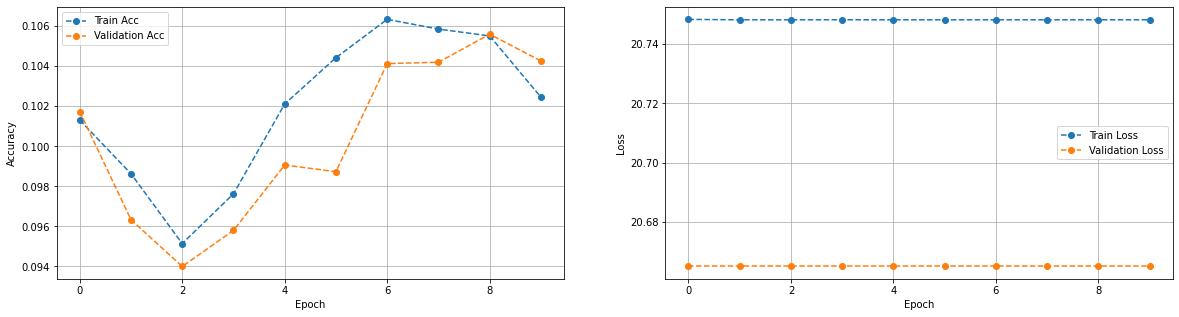

In [8]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [9]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=15, batch_size=128, validation_split=0.3)

Epoch 1/15
274/274 [==============================] - 5s 19ms/step - loss: 20.7483 - accuracy: 0.1044 - val_loss: 20.6649 - val_accuracy: 0.1090
Epoch 2/15
274/274 [==============================] - 5s 17ms/step - loss: 20.7483 - accuracy: 0.1005 - val_loss: 20.6649 - val_accuracy: 0.1077
Epoch 3/15
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0995 - val_loss: 20.6649 - val_accuracy: 0.1024
Epoch 4/15
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0987 - val_loss: 20.6649 - val_accuracy: 0.0972
Epoch 5/15
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1047 - val_loss: 20.6649 - val_accuracy: 0.0989
Epoch 6/15
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.1025 - val_loss: 20.6649 - val_accuracy: 0.1097
Epoch 7/15
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.0998 - val_loss: 20.6649 - val_ac

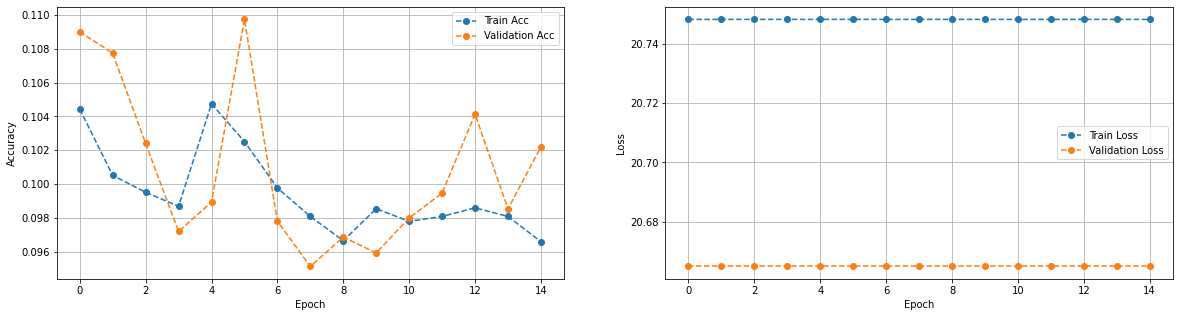

In [10]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [11]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=20, batch_size=128, validation_split=0.3)

Epoch 1/20
274/274 [==============================] - 4s 16ms/step - loss: 20.7483 - accuracy: 0.0974 - val_loss: 20.6649 - val_accuracy: 0.0983
Epoch 2/20
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0980 - val_loss: 20.6649 - val_accuracy: 0.1089
Epoch 3/20
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1004 - val_loss: 20.6649 - val_accuracy: 0.1026
Epoch 4/20
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1007 - val_loss: 20.6649 - val_accuracy: 0.1005
Epoch 5/20
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1016 - val_loss: 20.6649 - val_accuracy: 0.1002
Epoch 6/20
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.1013 - val_loss: 20.6649 - val_accuracy: 0.1033
Epoch 7/20
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.0997 - val_loss: 20.6649 - val_ac

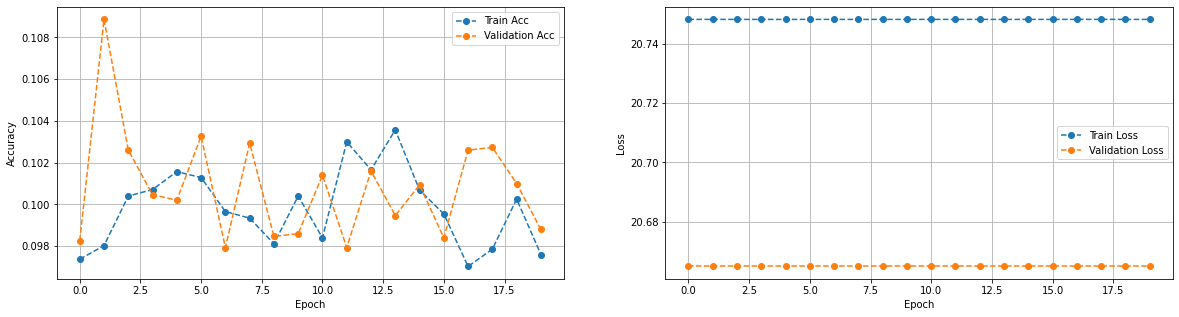

In [12]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [13]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=25, batch_size=128, validation_split=0.3)

Epoch 1/25
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.0981 - val_loss: 20.6649 - val_accuracy: 0.0995
Epoch 2/25
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0974 - val_loss: 20.6649 - val_accuracy: 0.1005
Epoch 3/25
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0987 - val_loss: 20.6649 - val_accuracy: 0.0983
Epoch 4/25
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0986 - val_loss: 20.6649 - val_accuracy: 0.1025
Epoch 5/25
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0991 - val_loss: 20.6649 - val_accuracy: 0.0999
Epoch 6/25
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0933 - val_loss: 20.6649 - val_accuracy: 0.0981
Epoch 7/25
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0963 - val_loss: 20.6649 - val_ac

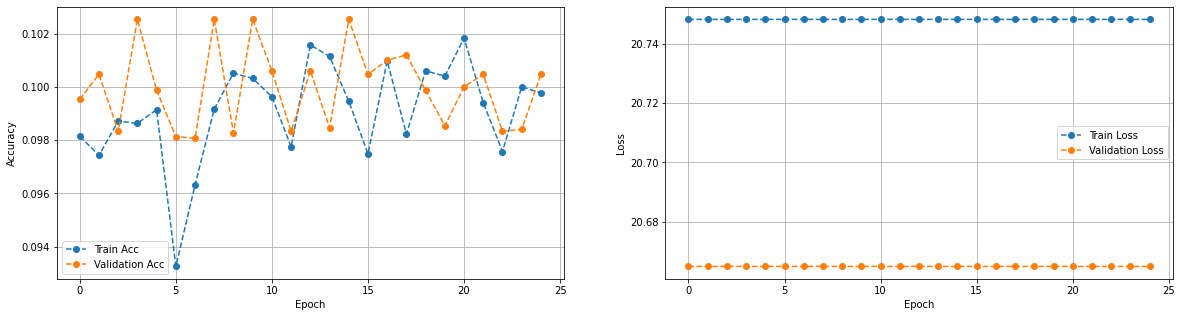

In [14]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [15]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=30, batch_size=128, validation_split=0.3)

Epoch 1/30
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.1001 - val_loss: 20.6649 - val_accuracy: 0.0998
Epoch 2/30
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1003 - val_loss: 20.6649 - val_accuracy: 0.1011
Epoch 3/30
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1001 - val_loss: 20.6649 - val_accuracy: 0.0984
Epoch 4/30
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1017 - val_loss: 20.6649 - val_accuracy: 0.0984
Epoch 5/30
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0996 - val_loss: 20.6649 - val_accuracy: 0.0983
Epoch 6/30
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1000 - val_loss: 20.6649 - val_accuracy: 0.0983
Epoch 7/30
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1019 - val_loss: 20.6649 - val_ac

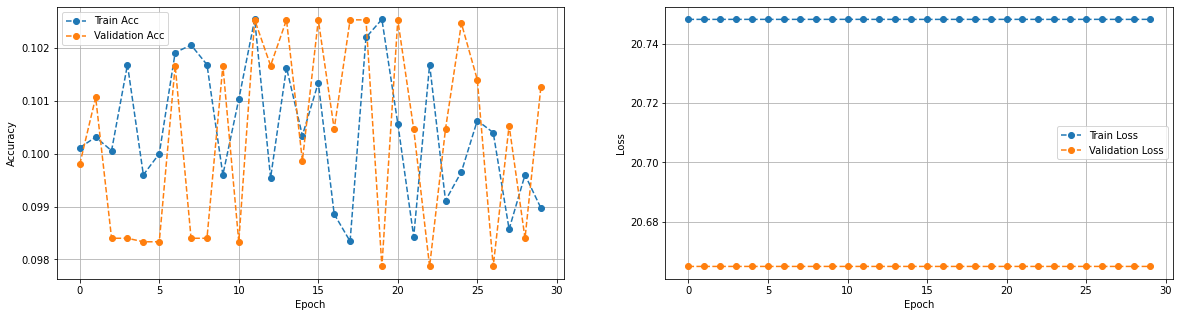

In [16]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [17]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=35, batch_size=128, validation_split=0.3)

Epoch 1/35
274/274 [==============================] - 4s 16ms/step - loss: 20.7483 - accuracy: 0.1032 - val_loss: 20.6649 - val_accuracy: 0.0983
Epoch 2/35
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0983 - val_loss: 20.6649 - val_accuracy: 0.0983
Epoch 3/35
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0997 - val_loss: 20.6649 - val_accuracy: 0.0999
Epoch 4/35
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0993 - val_loss: 20.6649 - val_accuracy: 0.0984
Epoch 5/35
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0998 - val_loss: 20.6649 - val_accuracy: 0.0999
Epoch 6/35
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0988 - val_loss: 20.6649 - val_accuracy: 0.0999
Epoch 7/35
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1014 - val_loss: 20.6649 - val_ac

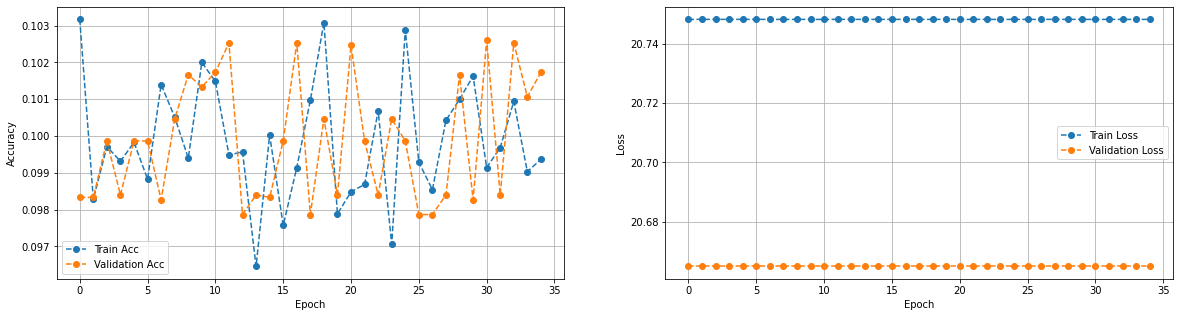

In [18]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [19]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=40, batch_size=128, validation_split=0.3)

Epoch 1/40
274/274 [==============================] - 4s 16ms/step - loss: 20.7483 - accuracy: 0.1026 - val_loss: 20.6649 - val_accuracy: 0.1017
Epoch 2/40
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1006 - val_loss: 20.6649 - val_accuracy: 0.1017
Epoch 3/40
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0979 - val_loss: 20.6649 - val_accuracy: 0.0983
Epoch 4/40
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0982 - val_loss: 20.6649 - val_accuracy: 0.1014
Epoch 5/40
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0993 - val_loss: 20.6649 - val_accuracy: 0.0979
Epoch 6/40
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1001 - val_loss: 20.6649 - val_accuracy: 0.1017
Epoch 7/40
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1026 - val_loss: 20.6649 - val_ac

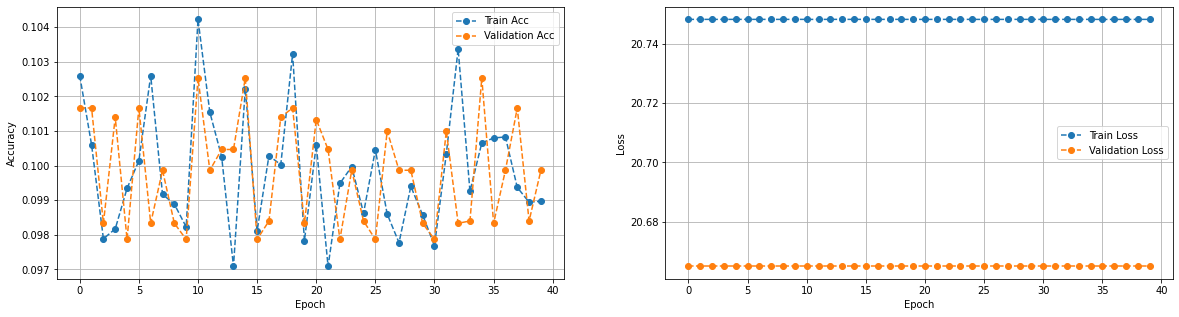

In [20]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [21]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=45, batch_size=128, validation_split=0.3)

Epoch 1/45
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.0982 - val_loss: 20.6649 - val_accuracy: 0.1013
Epoch 2/45
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0987 - val_loss: 20.6649 - val_accuracy: 0.0979
Epoch 3/45
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0983 - val_loss: 20.6649 - val_accuracy: 0.1010
Epoch 4/45
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1013 - val_loss: 20.6649 - val_accuracy: 0.1025
Epoch 5/45
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0990 - val_loss: 20.6649 - val_accuracy: 0.0984
Epoch 6/45
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0989 - val_loss: 20.6649 - val_accuracy: 0.0983
Epoch 7/45
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0981 - val_loss: 20.6649 - val_ac

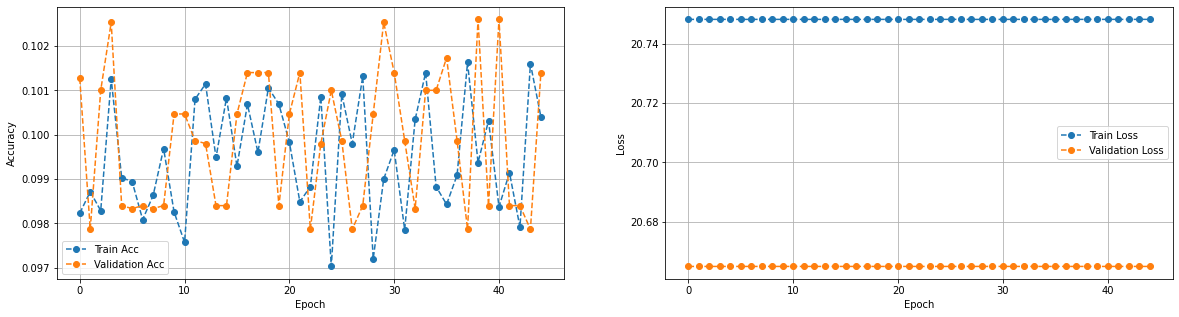

In [22]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()

In [23]:
h = model.fit(x=train_images_norm, y=train_labels, epochs=50, batch_size=128, validation_split=0.3)

Epoch 1/50
274/274 [==============================] - 4s 15ms/step - loss: 20.7483 - accuracy: 0.1007 - val_loss: 20.6649 - val_accuracy: 0.0979
Epoch 2/50
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1002 - val_loss: 20.6649 - val_accuracy: 0.0983
Epoch 3/50
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0993 - val_loss: 20.6649 - val_accuracy: 0.0984
Epoch 4/50
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0998 - val_loss: 20.6649 - val_accuracy: 0.0979
Epoch 5/50
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.1019 - val_loss: 20.6649 - val_accuracy: 0.1025
Epoch 6/50
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0992 - val_loss: 20.6649 - val_accuracy: 0.1005
Epoch 7/50
274/274 [==============================] - 4s 14ms/step - loss: 20.7483 - accuracy: 0.0981 - val_loss: 20.6649 - val_ac

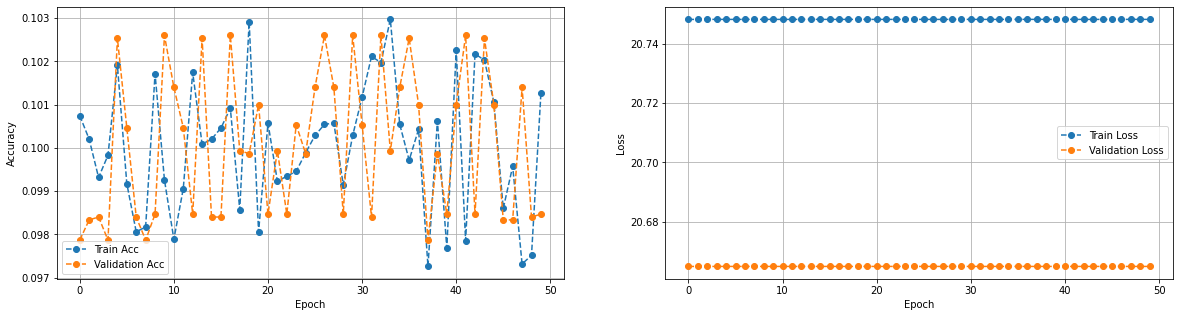

In [24]:
plt.figure(figsize = (20,5))

plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o')
plt.plot(h.history['val_accuracy'], '--o')
plt.legend(['Train Acc', 'Validation Acc'])
plt.grid(True)
#plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o')
plt.plot(h.history['val_loss'], '--o')
plt.legend(['Train Loss', 'Validation Loss'])
plt.grid(True)
#plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.show()